# Обзор датасетов

In [1]:
import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

## Примеры использования генератора датасетов

In [2]:
from src.data_utils.dataset_generator import DatasetGenerator
from src.data_utils.config import DatasetConfig
from src.data_utils.dataset_params import DatasetName

generator = DatasetGenerator(DatasetName.IMDB)

### Полный пайплайн получения тензоров

In [3]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = generator.generate_dataset()

X_train.shape

torch.Size([10000, 300])

### Получение словаря (после вызова `build_vocabulary` или `generate_dataset`)

In [4]:
vocab, id2word = generator.get_vocabulary()
id2word[123]

'means'

### Настройка конфига

In [5]:
config = DatasetConfig(
    train_size=128,
    val_size=64,
    test_size=32,
)

custom_generator = DatasetGenerator(dataset_name=DatasetName.POLARITY, config=config)

train_df, val_df, test_df = custom_generator.load_raw_data()
train_df.shape, val_df.shape, test_df.shape

((128, 3), (64, 3), (32, 3))

## Визуализация для датасета `stanfordnlp/imdb`

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nltk.probability import FreqDist

In [7]:
generator = DatasetGenerator(DatasetName.IMDB)

df_imdb_train, df_imdb_val, df_imdb_test = generator.load_raw_data()
df_imdb_full = pd.concat([df_imdb_train, df_imdb_val, df_imdb_test])

### Базовая информация о датасете

In [8]:
print(f"Общее количество примеров: {len(df_imdb_full)}")
print(f"Количество классов: {df_imdb_full["label"].nunique()}")
print("\nПервые 5 примеров:")
df_imdb_full.head()

Общее количество примеров: 20000
Количество классов: 2

Первые 5 примеров:


text  label
6868   Dumb is as dumb does, in this thoroughly unint...      0
24016  I dug out from my garage some old musicals and...      1
9668   After watching this movie I was honestly disap...      0
13640  This movie was nominated for best picture but ...      1
14018  Just like Al Gore shook us up with his painful...      1

### Распределение классов

In [9]:
df_imdb_full["label"].value_counts()

label
1    10010
0     9990
Name: count, dtype: int64

### Анализ длины текстов

Описательная статистика длины текстов:
count    20000.00000
mean       231.54310
std        172.10072
min          4.00000
25%        127.00000
50%        173.00000
75%        280.00000
max       2470.00000
Name: text_length, dtype: float64


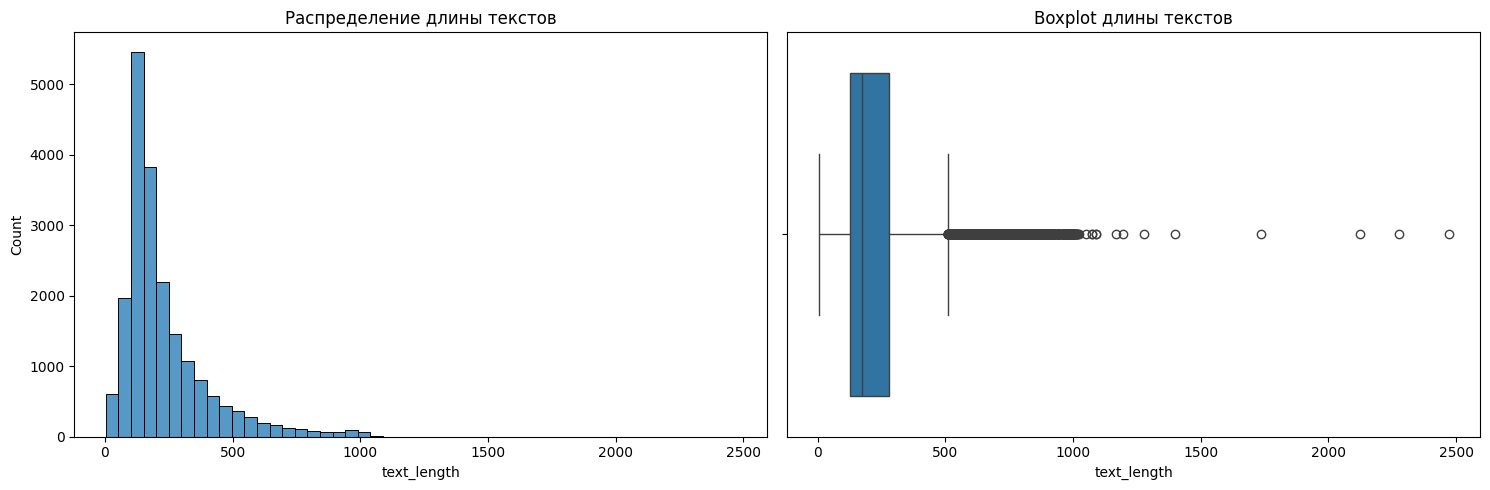

In [10]:
df_imdb_full["text_length"] = df_imdb_full["text"].apply(lambda x: len(x.split()))

print("Описательная статистика длины текстов:")
print(df_imdb_full["text_length"].describe())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_imdb_full["text_length"], bins=50)
plt.title("Распределение длины текстов")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_imdb_full["text_length"])
plt.title("Boxplot длины текстов")
plt.tight_layout()

### Анализ словаря

Общее количество уникальных слов: 100868
20 самых частых слов:
[('the', 266485), (',', 217172), ('.', 186495), ('and', 129950), ('a', 128903), ('of', 115424), ('to', 107088), ('is', 87081), ('/', 80891), ('>', 80860), ('<', 80789), ('br', 80703), ('it', 75362), ('in', 74001), ('i', 69505), ('this', 59897), ('that', 57380), ("'s", 49042), ('was', 40141), ('as', 36666)]


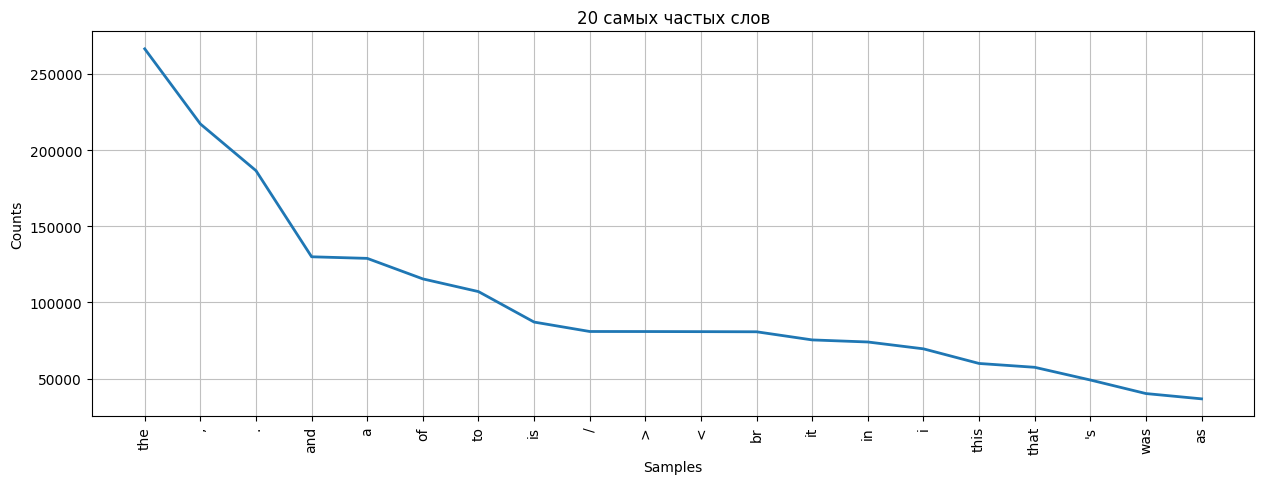

In [11]:
text_processor = generator.get_text_processor()
tokenized_texts = [text_processor.preprocess_text(text) for text in df_imdb_full["text"].tolist()]
all_tokens = [item for sublist in tokenized_texts for item in sublist]

fdist = FreqDist(all_tokens)
print(f"Общее количество уникальных слов: {len(fdist)}")
print("20 самых частых слов:")
print(fdist.most_common(20))

plt.figure(figsize=(15, 5))
fdist.plot(20, title="20 самых частых слов")
None

### Длина текстов по классам

Text(0.5, 1.0, 'Распределение длины текстов по классам')

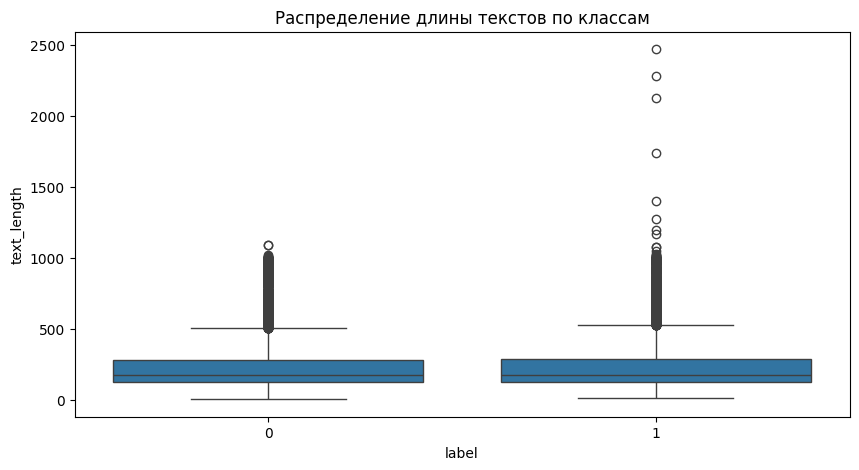

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_imdb_full, x="label", y="text_length")
plt.title("Распределение длины текстов по классам")

### Примеры текстов по классам

In [13]:
for label in sorted(df_imdb_full["label"].unique()):
    print(f"\nКласс {label}:")
    sample = df_imdb_full[df_imdb_full["label"] == label]["text"].sample(1).values[0]
    print(f"{sample[:500]}...")


Класс 0:
First let me say I'm not someone who usually cringe at the fact of having to think while seeing movies, I love Tarkowsky movies for example, Berghman is also a favorite.....but this? The positive points can be summed up easily: the photography is splendid, and the music is perfect....does it make a good movie? I used to think so, but this one is a perfect example of one that (for me) doesn't make it.... maybe it's because I'm too dumb? possible, but I don't think so.... Tarkwosky for example als...

Класс 1:
Both Robert Duvall and Glenn Close played their roles with such believability, I simply cried. Glenn Close's role as Ruth, showed her wanting to deal with the situation, but she was under the domination of her husband. "Let him think about what he did," Robert Duvall's character, Joe, said staunchly. The story depicted a rural family dealing with an accidental death of a son by his brother, called "The Stone Boy," meaning he was so distraught and overwhelmed by what he di

## Визуализация для датасета `fancyzhx/amazon_polarity`

In [14]:
generator = DatasetGenerator(DatasetName.POLARITY)

df_polar_train, df_polar_val, df_polar_test = generator.load_raw_data()
df_polar_full = pd.concat([df_polar_train, df_polar_val, df_polar_test])

### Базовая информация о датасете

In [15]:
print(f"Общее количество примеров: {len(df_polar_full)}")
print(f"Количество классов: {df_polar_full["label"].nunique()}")
print("\nПервые 5 примеров:")
df_polar_full.head()

Общее количество примеров: 20000
Количество классов: 2

Первые 5 примеров:


label                                   title  \
2079998      0                          Expensive Junk   
1443106      0                          Toast too dark   
3463669      1   Excellent imagery...dumbed down story   
2914699      0  Are we pretending everyone is married?   
1603231      0                     Not worth your time   

                                                   content  
2079998  This product consists of a piece of thin flexi...  
1443106  Even on the lowest setting, the toast is too d...  
3463669  I enjoyed this disc. The video is stunning. I ...  
2914699  The authors pretend that parents neither die n...  
1603231  Might as well just use a knife, this product h...

### Распределение классов

In [16]:
df_polar_full["label"].value_counts()

label
1    10106
0     9894
Name: count, dtype: int64

### Анализ длины текстов

Описательная статистика длины текстов:
count    20000.000000
mean        73.689050
std         42.197284
min          9.000000
25%         38.000000
50%         65.000000
75%        102.000000
max        202.000000
Name: text_length, dtype: float64


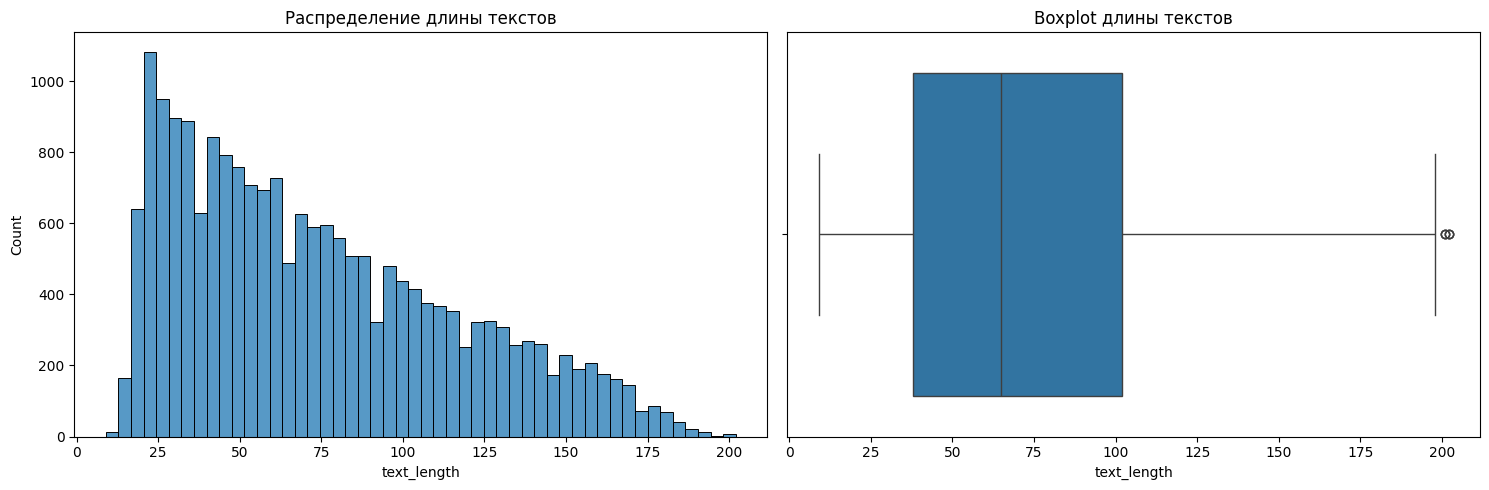

In [17]:
df_polar_full["text_length"] = df_polar_full["content"].apply(lambda x: len(x.split()))

print("Описательная статистика длины текстов:")
print(df_polar_full["text_length"].describe())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_polar_full["text_length"], bins=50)
plt.title("Распределение длины текстов")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_polar_full["text_length"])
plt.title("Boxplot длины текстов")
plt.tight_layout()

### Анализ словаря

Общее количество уникальных слов: 61120
20 самых частых слов:
[('.', 79235), ('the', 75553), (',', 54469), ('i', 43963), ('and', 41193), ('a', 37385), ('to', 37211), ('it', 34717), ('of', 30205), ('this', 27750), ('is', 27048), ('in', 17191), ('for', 16055), ('that', 15680), ('was', 13456), ('you', 12999), ('!', 12055), ('not', 11602), ('but', 10971), ('with', 10767)]


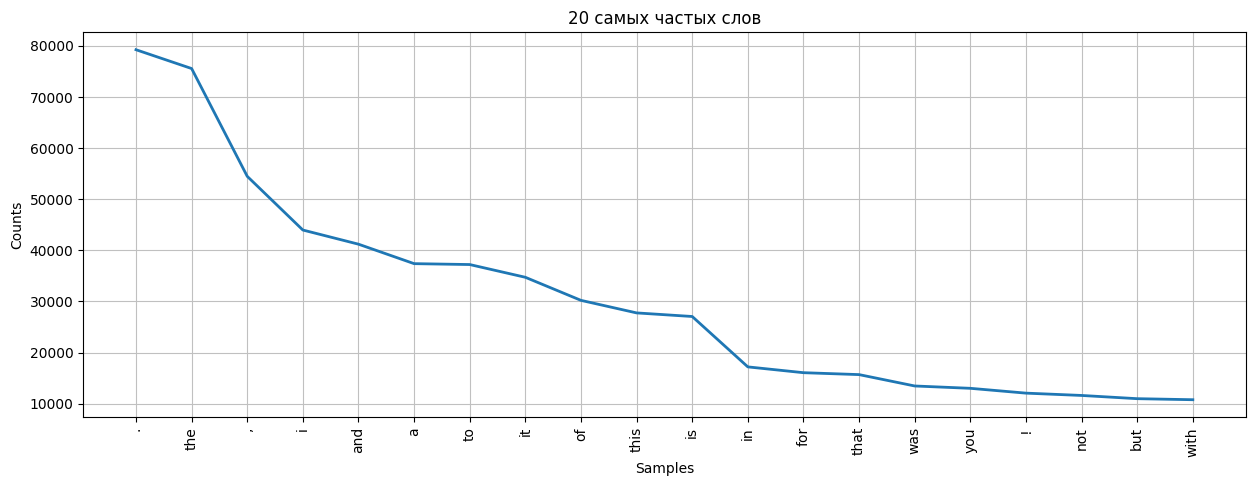

In [18]:
text_processor = generator.get_text_processor()
tokenized_texts = [text_processor.preprocess_text(text) for text in df_polar_full["content"].tolist()]
all_tokens = [item for sublist in tokenized_texts for item in sublist]

fdist = FreqDist(all_tokens)
print(f"Общее количество уникальных слов: {len(fdist)}")
print("20 самых частых слов:")
print(fdist.most_common(20))

plt.figure(figsize=(15, 5))
fdist.plot(20, title="20 самых частых слов")
None

### Длина текстов по классам

Text(0.5, 1.0, 'Распределение длины текстов по классам')

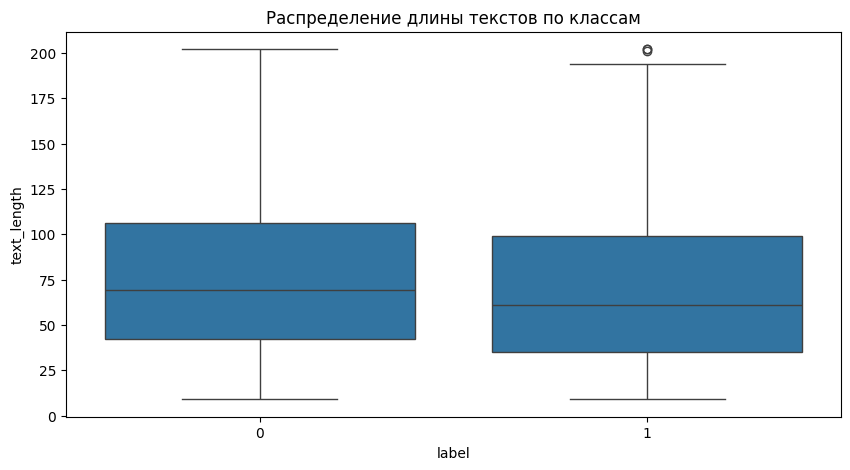

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_polar_full, x="label", y="text_length")
plt.title("Распределение длины текстов по классам")

### Примеры текстов по классам

In [20]:
for label in sorted(df_polar_full["label"].unique()):
    print(f"\nКласс {label}:")
    sample = df_polar_full[df_polar_full["label"] == label]["content"].sample(1).values[0]
    print(f"{sample[:500]}...")


Класс 0:
The item was of inferior quality and was difficult to get to work. I returned the item for a refund....

Класс 1:
I also bought the Sylvania DVC860D DVD & VCR combo as a replacement for a cheap "Monkey Wards" VCR I bought 8yrs. ago for a much greater price than this unit. What a great Christmas buy at $99.99! It works great in re-running VHS Tapes out of my library and has played all the DVD's I have burnt with my new Plextor 708A DVD Burner.Also, this unit even hooked up to my 14yr. old TV using RF cables: how about that! This product does it all that they say it will, and is a fantastic bargain. I truly r...
